In [1]:
import json
import os
from functools import partial
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from statsmodels.distributions import ECDF

import plot_metrics as pm

In [2]:
model="qm9"
metrics=[
    ("Mean Square Error", "loss"),
    ("Mean Absolute Error", "mean_absolute_error"),
    ("Validation Mean Square Error", "val_loss"),
    ("Validation Mean Absolute Error", "val_mean_absolute_error"),
]

In [3]:
# model="radio-resource-management"
# metrics=[
#     ("Sum Rate Loss", "loss"),
#     ("WMMSE Sum Rate Ratio", "sum_rate_metric"),
#     ("Validation Sum Rate Loss", "val_loss"),
#     ("Validation WMMSE Sum Rate Ratio", "val_sum_rate_metric"),
# ]

In [4]:
model_labels=[
    ("GNN TF2", "gnn"),
    ("iGNNition", "experiment"),
]
output_dir=Path("plots")

In [5]:
log_dir = Path(f"ignnition/{model}/logs")
log_dir.mkdir(parents=True, exist_ok=True)
output_dir.mkdir(parents=True, exist_ok=True)

runs = [_dir for _dir in log_dir.glob("*") if _dir.is_dir()]
print(f"Found {len(runs)} log directories, extracting stats...")

Found 220 log directories, extracting stats...


In [6]:
stats = pm.get_stats(runs, metrics, model_labels)
print("Stats extracted, making plots...")

Stats extracted, making plots...


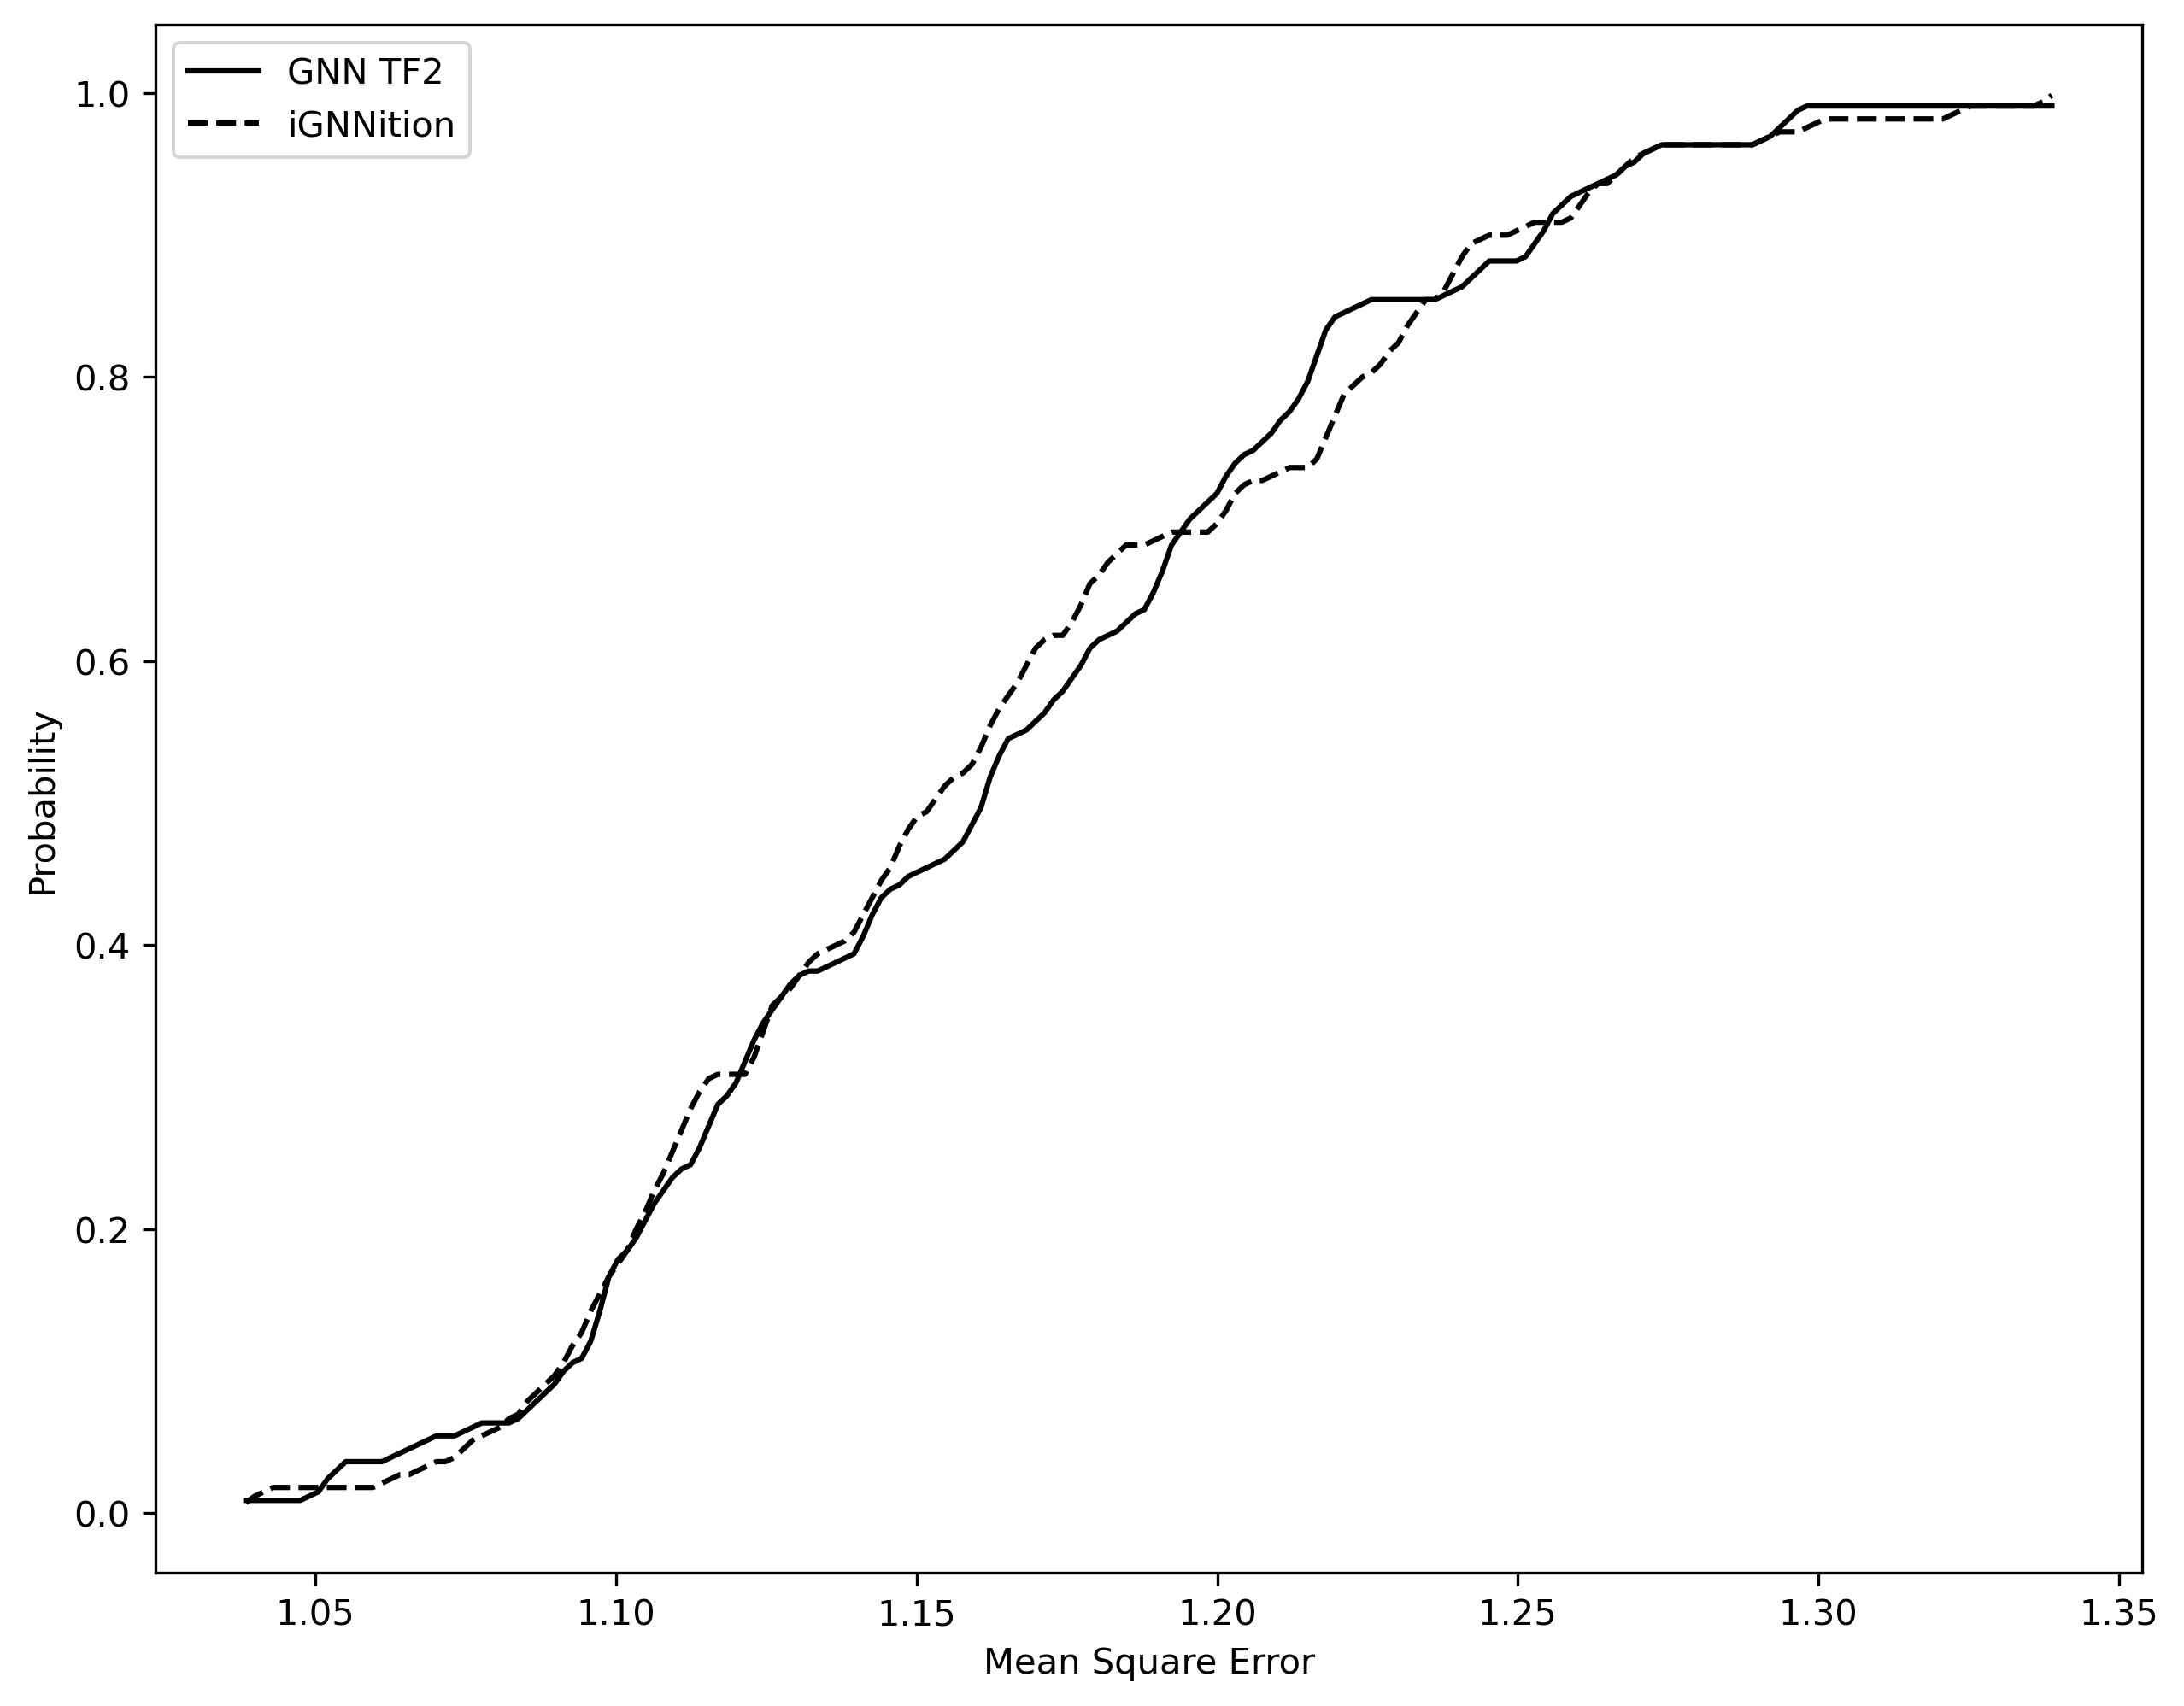

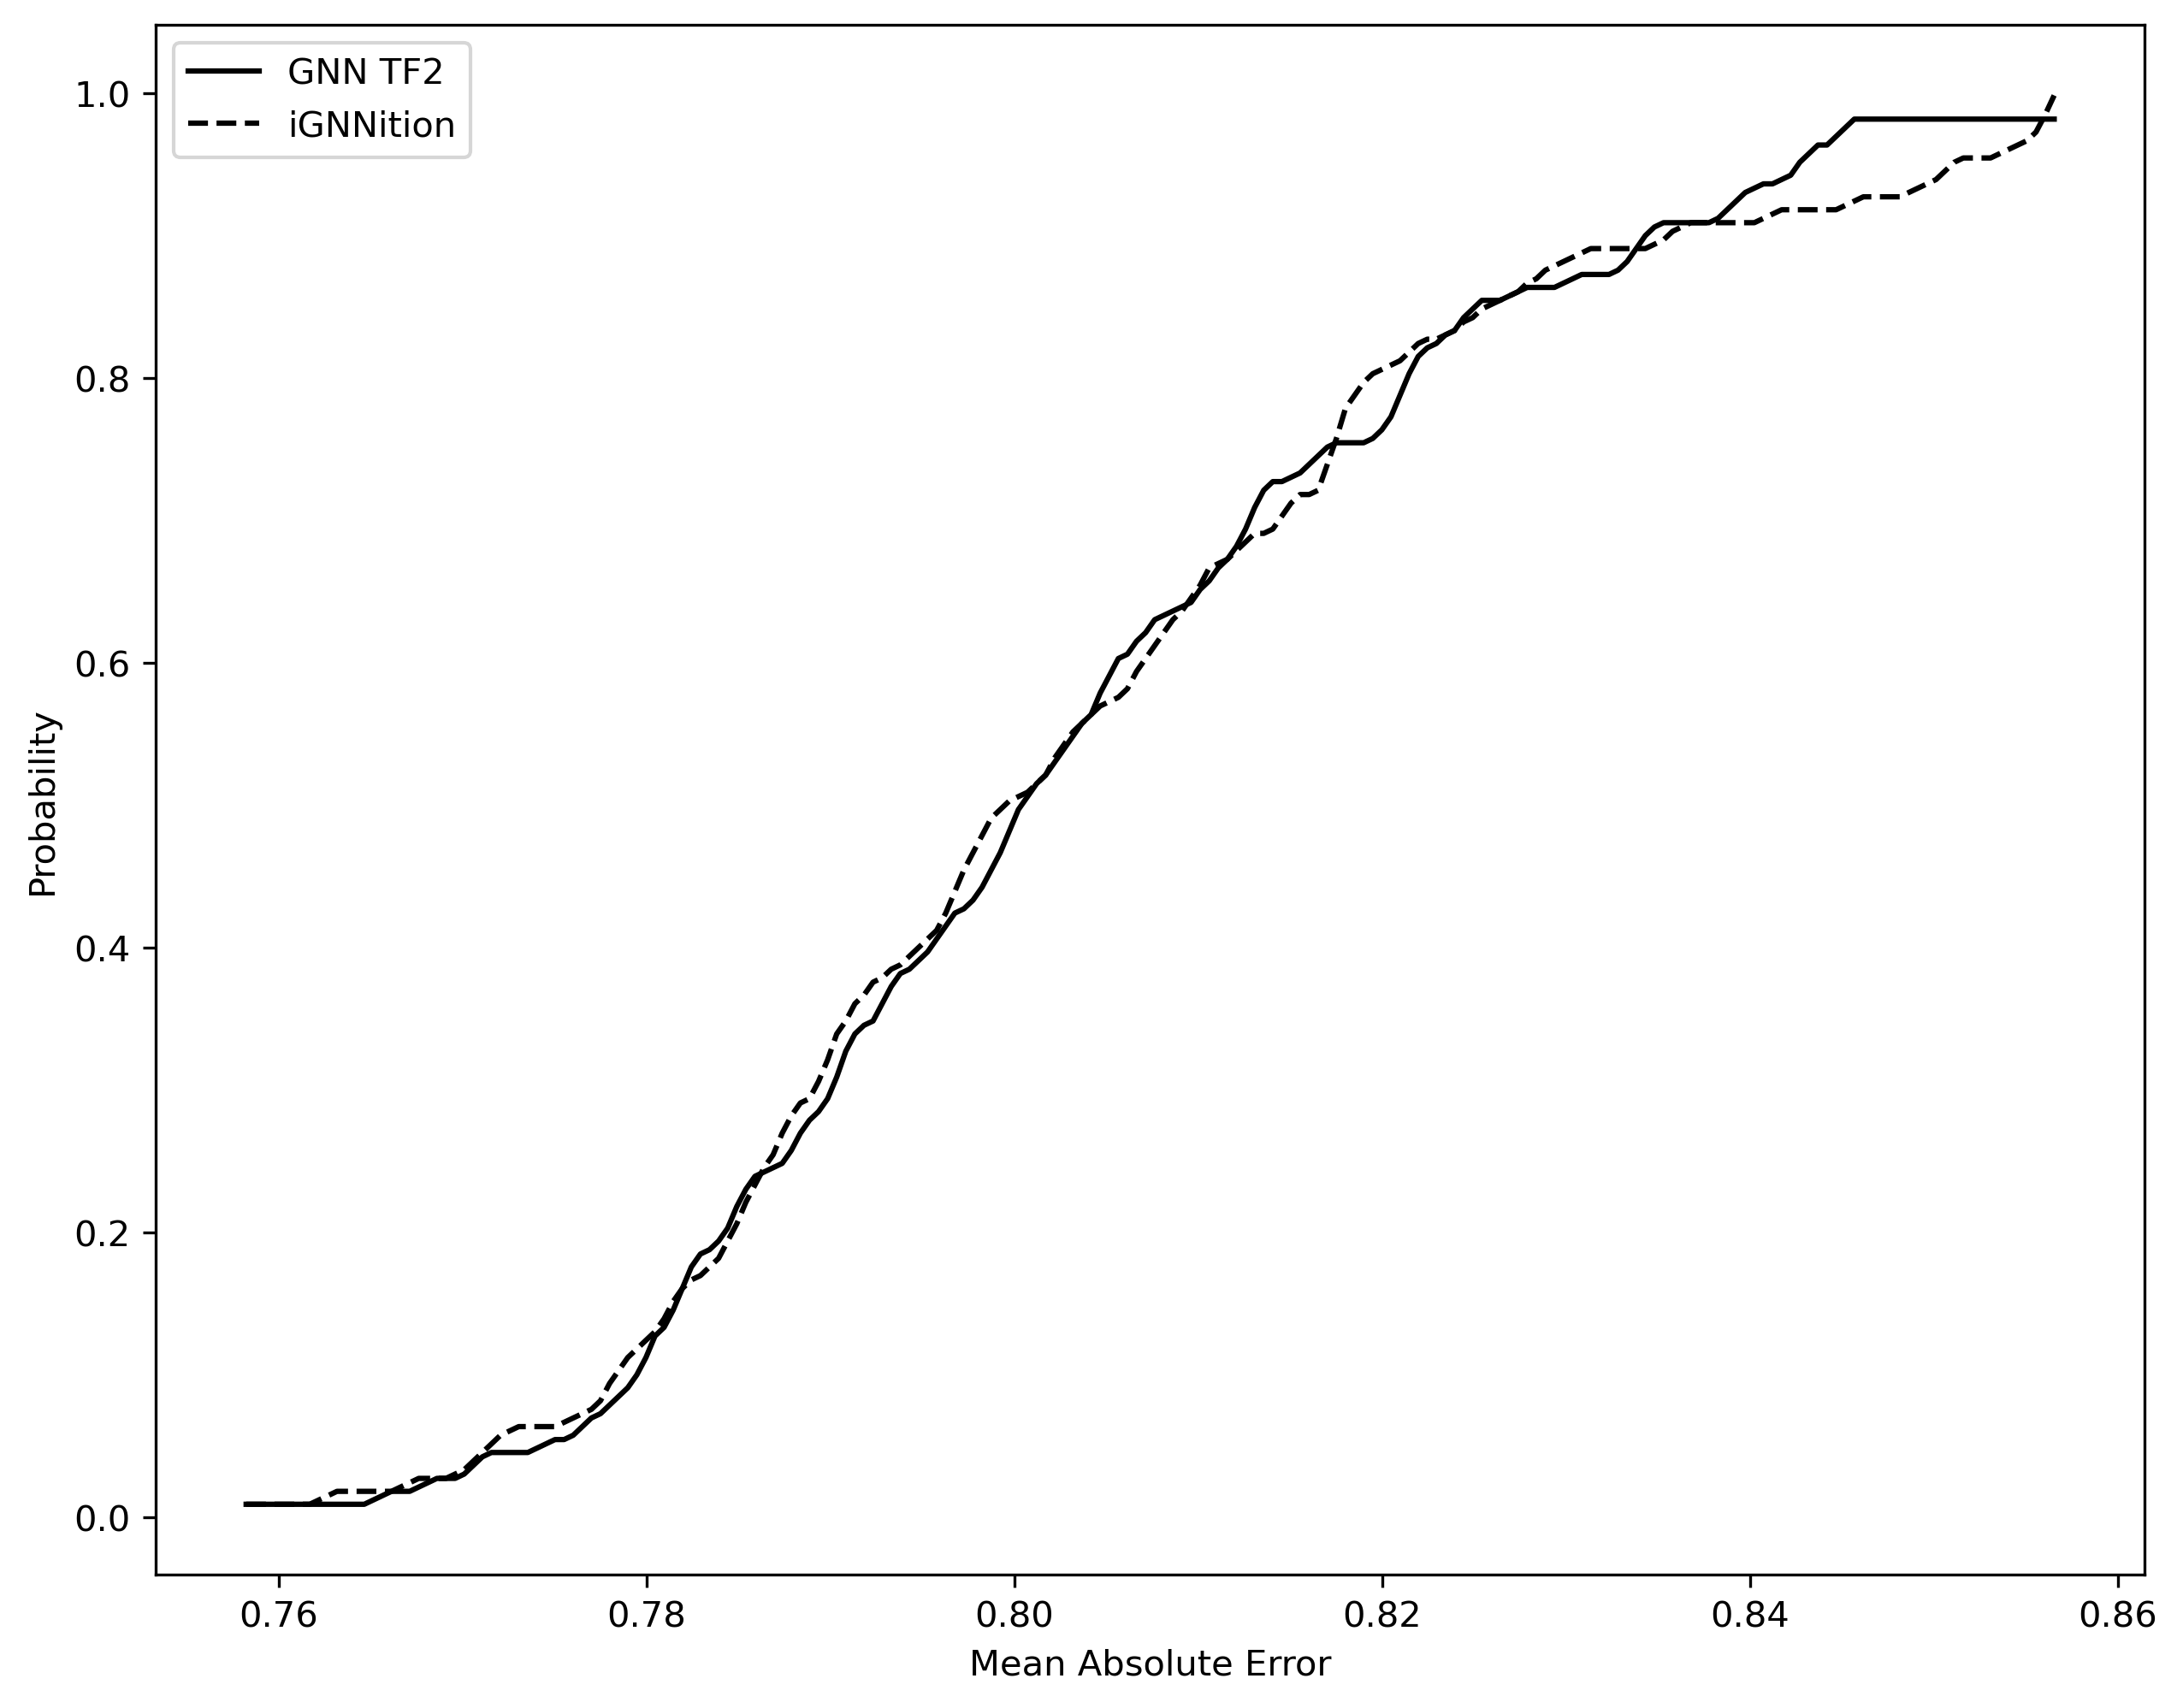

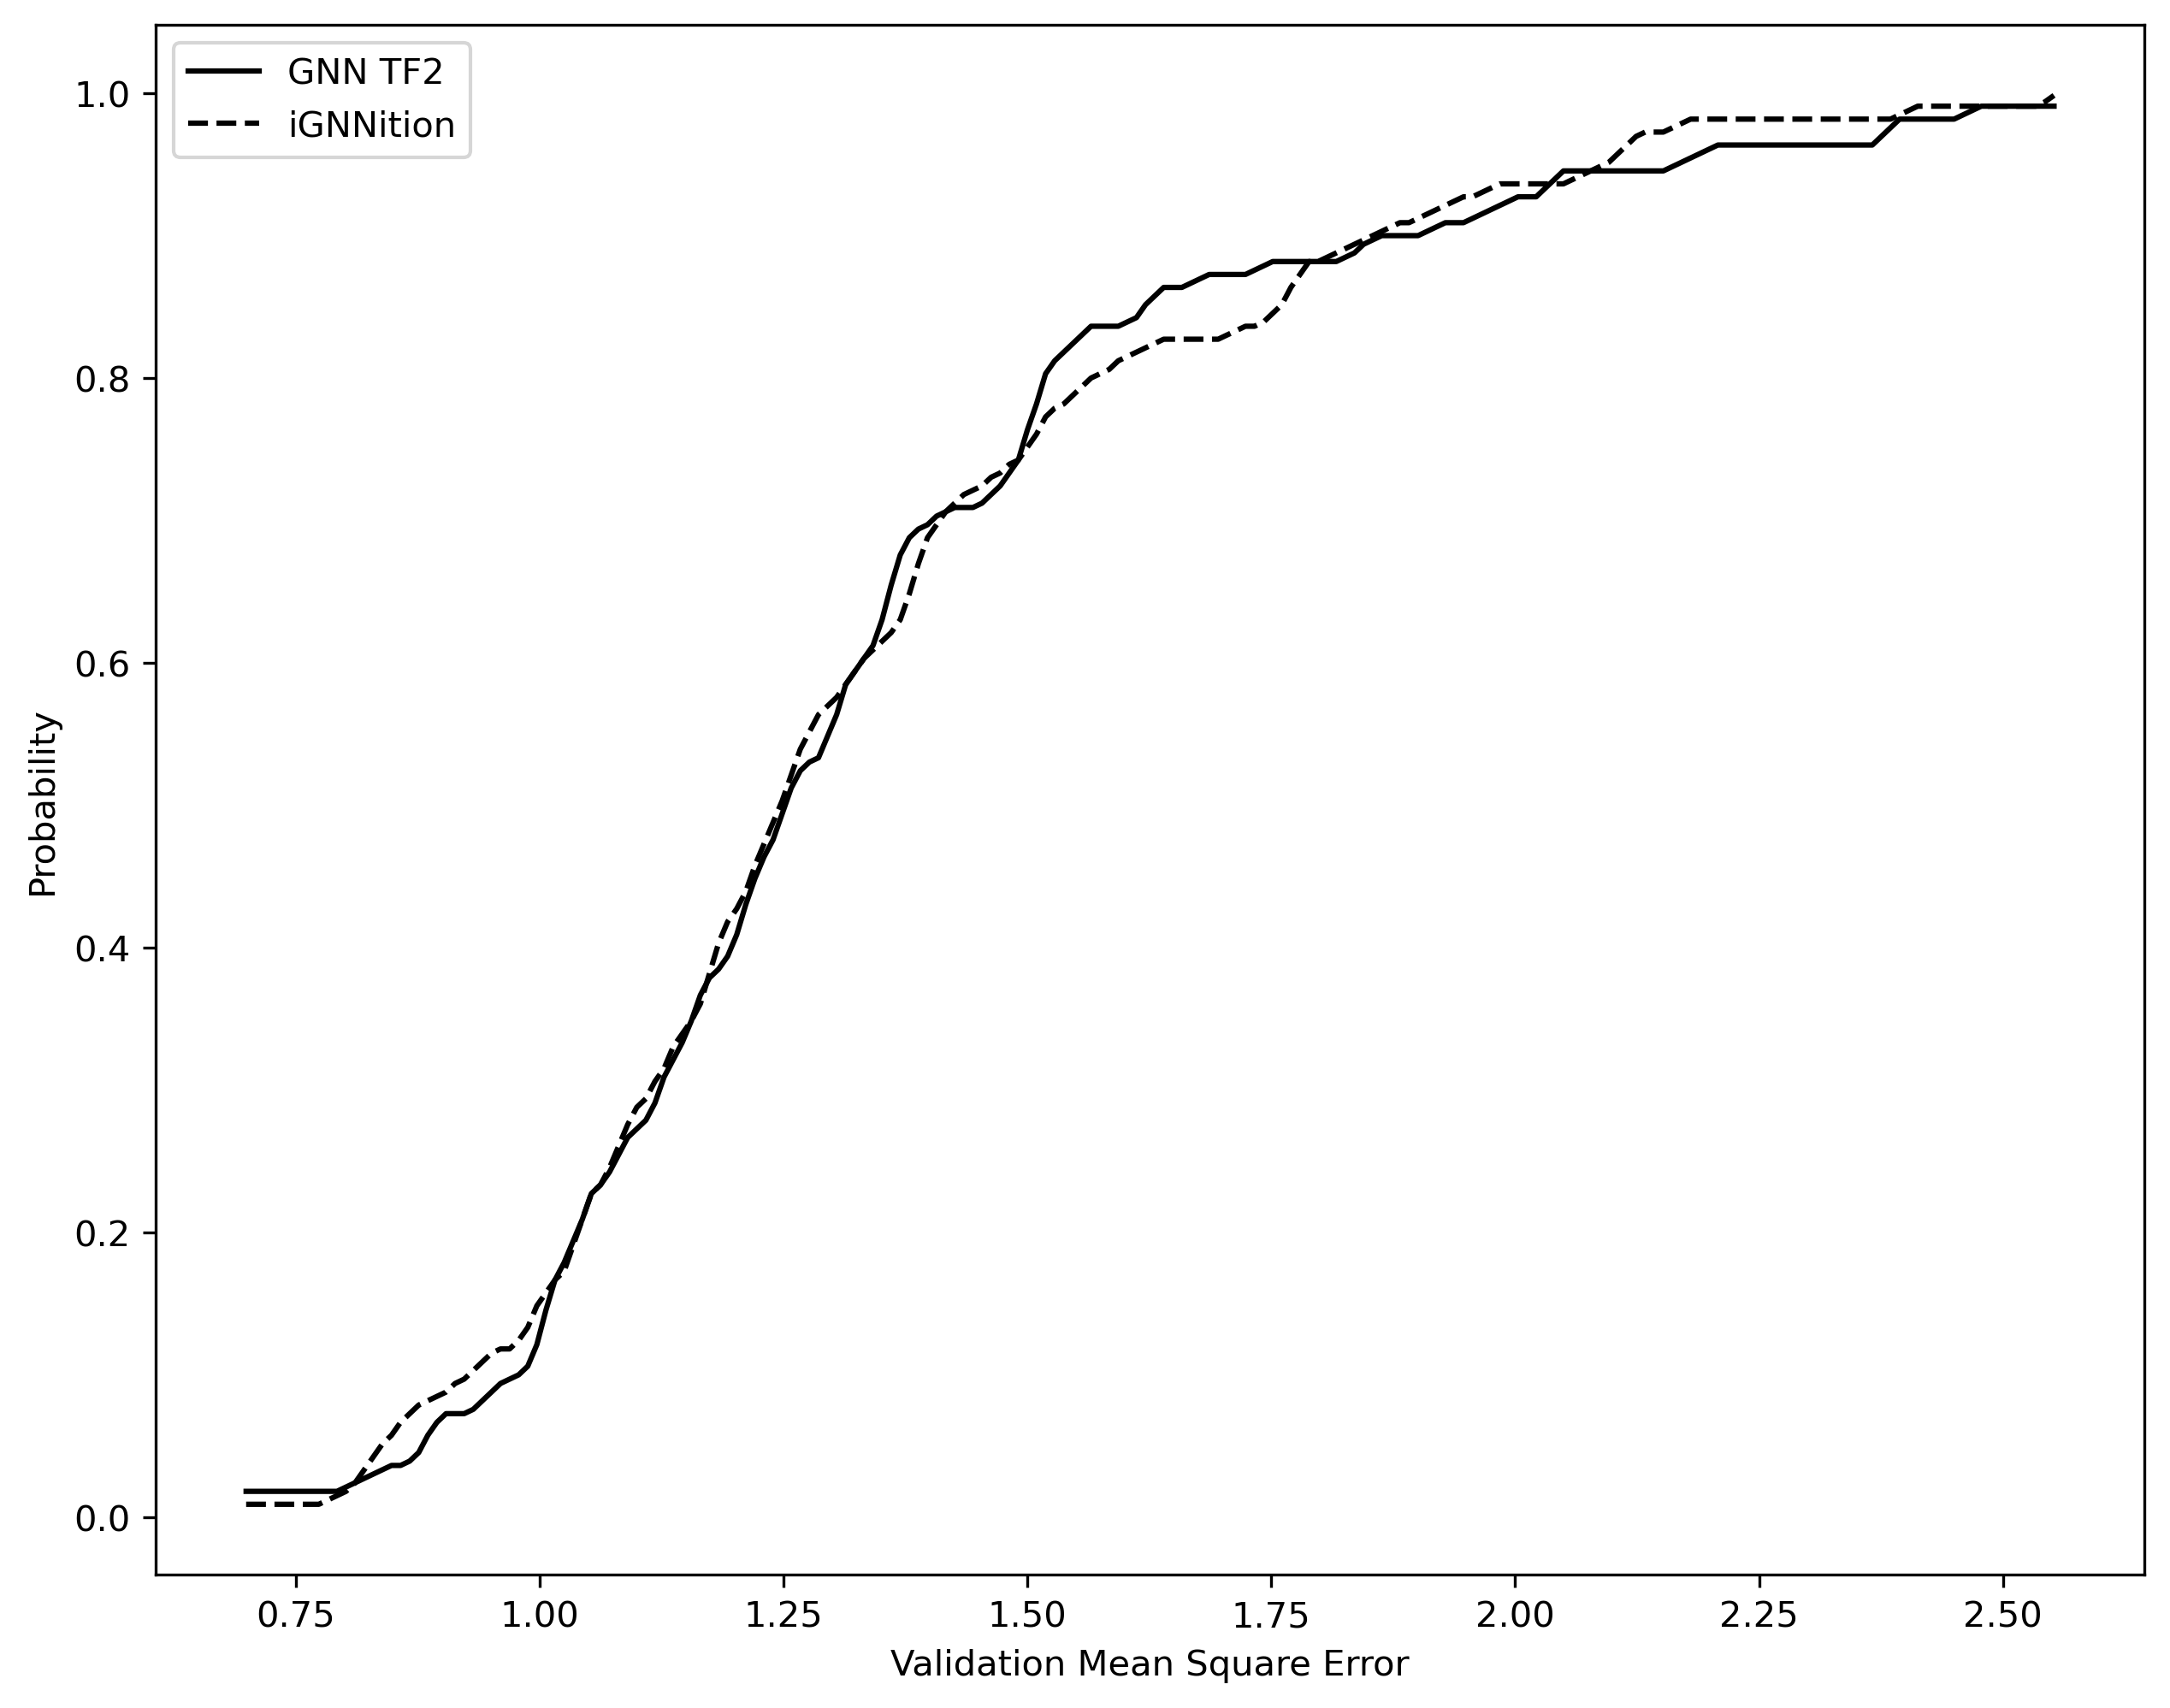

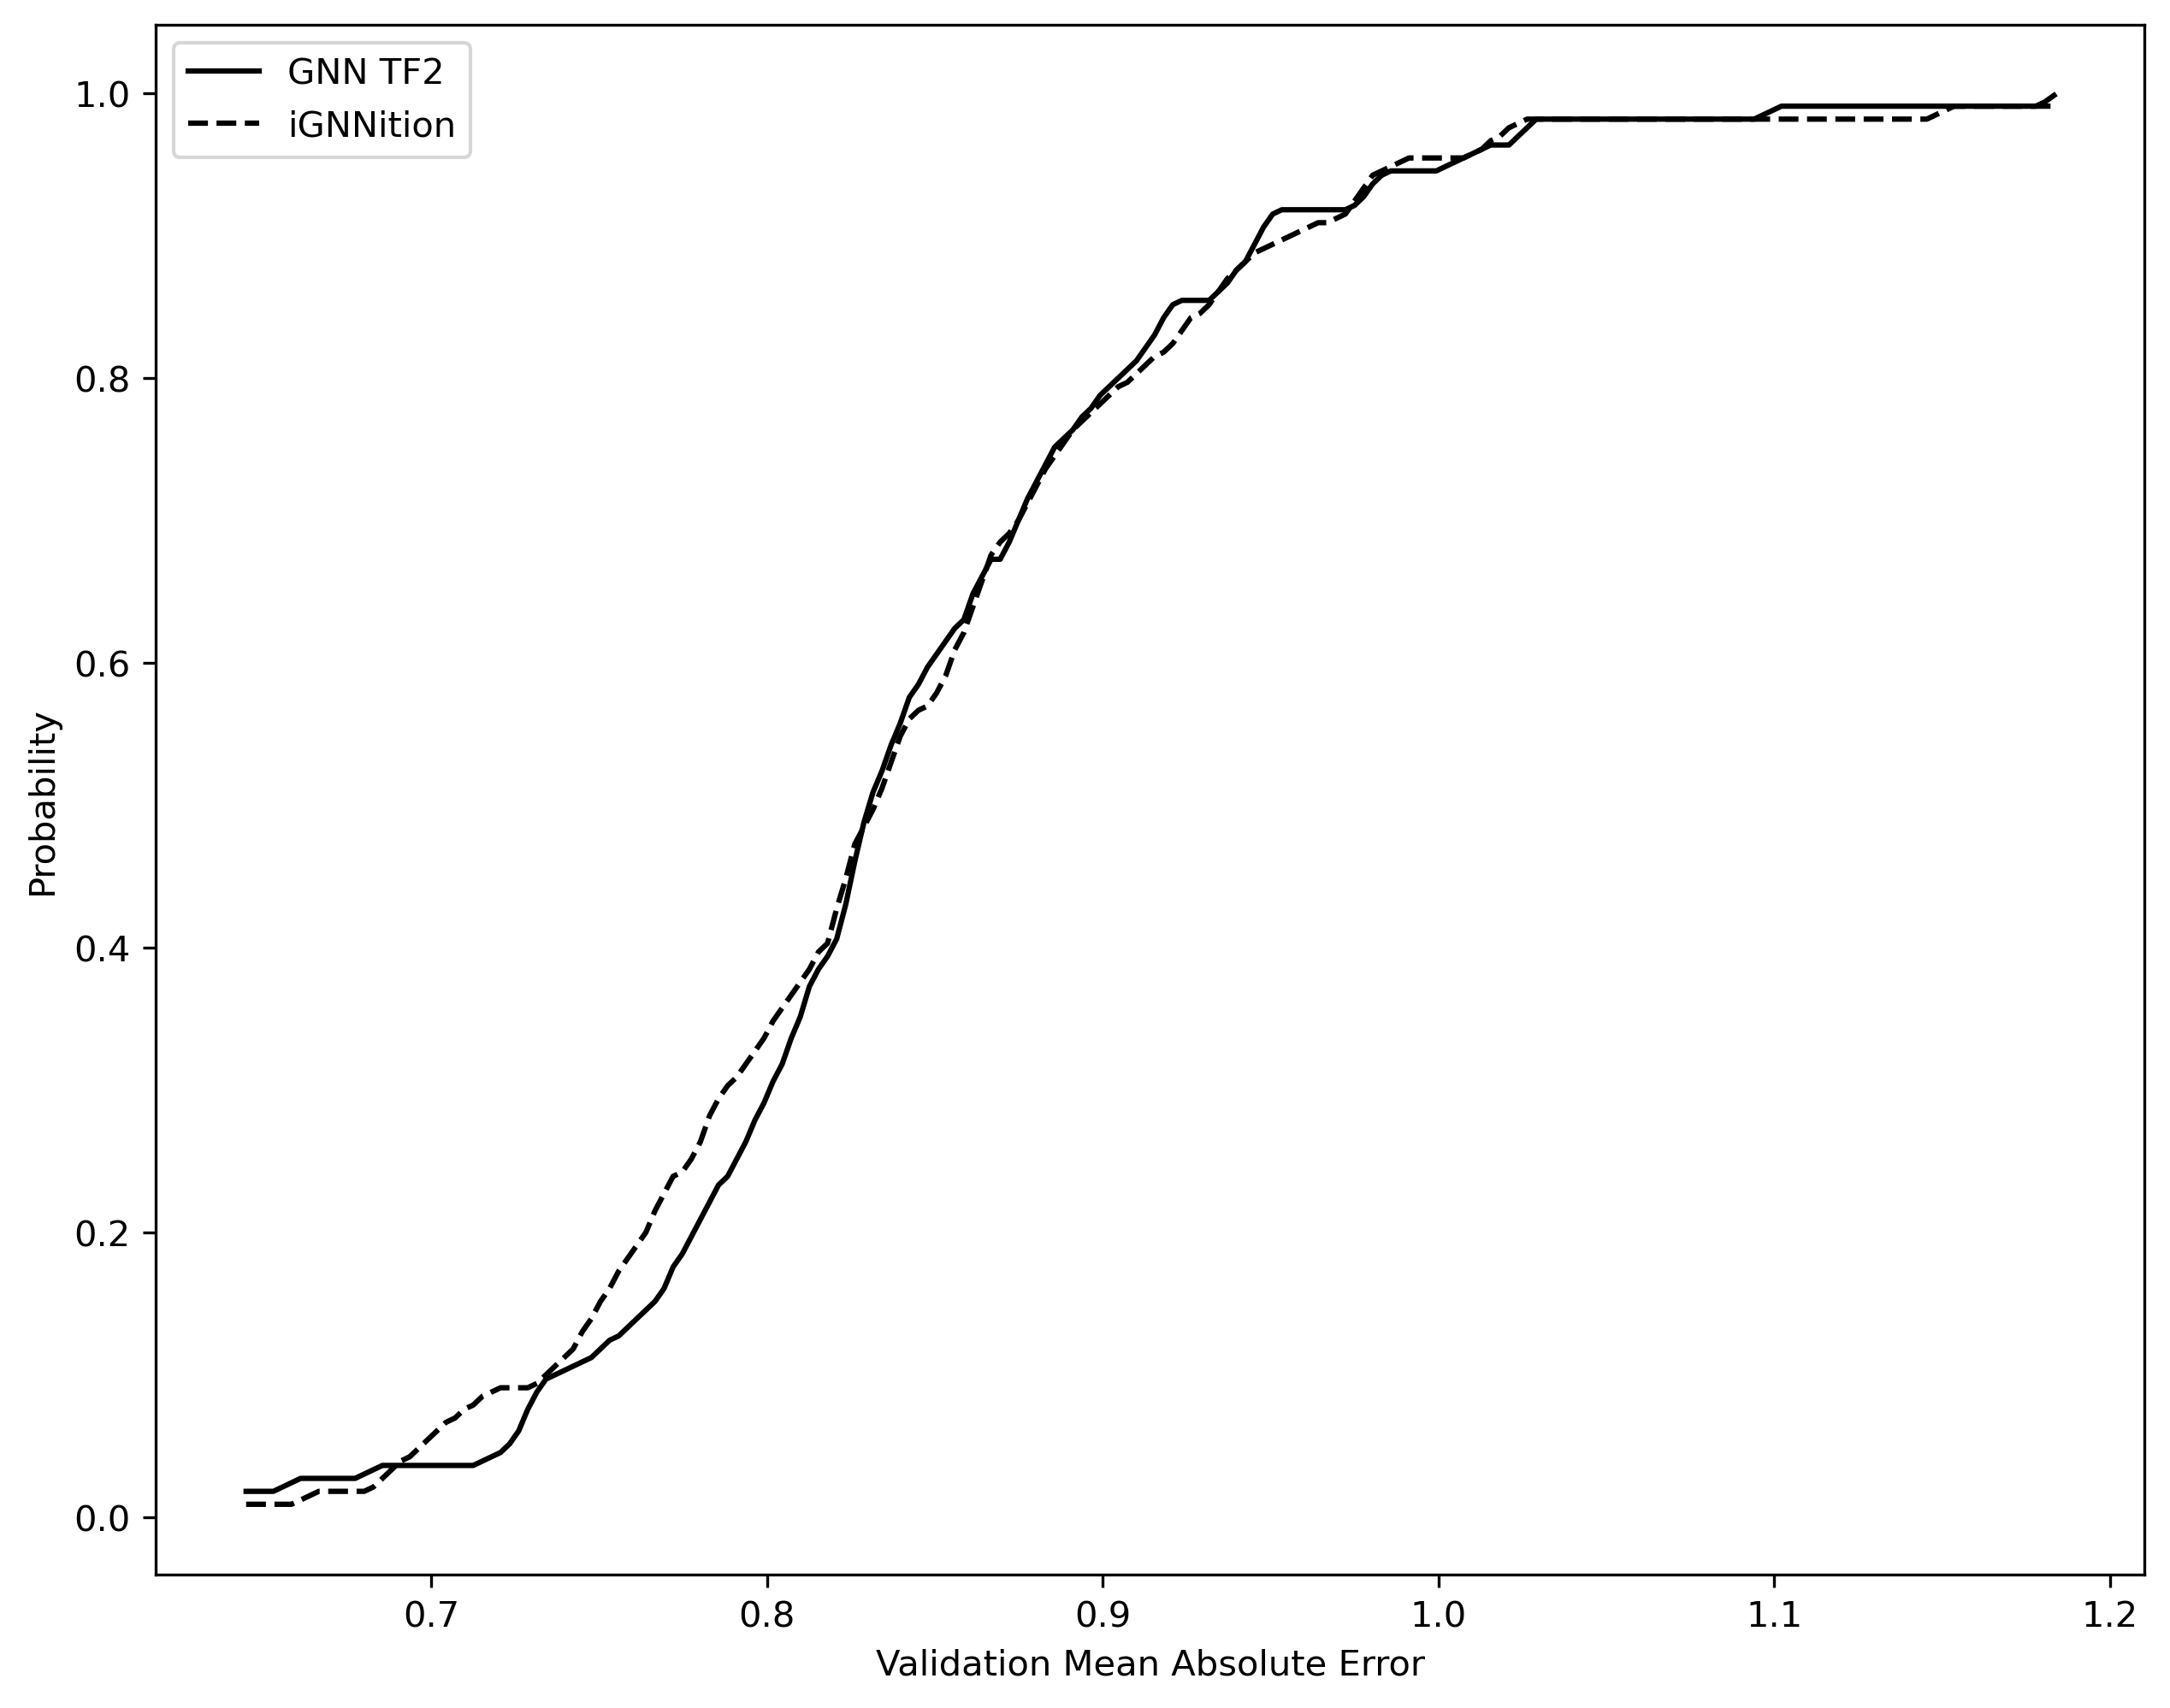

In [7]:
pm.ecdf_plots(model, stats, metrics, output_dir, smooth=True)